# Data fields:

## Data Dictionary:

Variable&emsp;&emsp;&emsp;&emsp;Definition&emsp;&emsp;&emsp;&emsp;Key  
survival&emsp;&emsp;&emsp;&emsp;Survival&emsp;&emsp;&emsp;&emsp;0 = No, 1 = Yes  
pclass&emsp;&emsp;&emsp;&emsp;Ticket class&emsp;&emsp;&emsp;&emsp;1 = 1st, 2 = 2nd, 3 = 3rd  
sex&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Sex  	
Age&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Age&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;in years  	
sibsp&emsp;&emsp;&emsp;# of siblings / spouses aboard the Titanic  
parch&emsp;&emsp;&emsp;# of parents / children aboard the Titanic  
ticket&emsp;&emsp;&emsp;&emsp;&emsp;Ticket number  
fare&emsp;&emsp;&emsp;&emsp;&emsp;Passenger fare  
cabin&emsp;&emsp;&emsp;&emsp;&emsp;Cabin number  	
embarked&emsp;&emsp;&emsp;Port of Embarkation&emsp;&emsp;C = Cherbourg, Q = Queenstown, S = Southampton  

## Variable Notes:

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.


In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifier, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

# feature_selection, metrics

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# -----------------------------------------------------------------------------------------------------

# Importation Train_set Datas

# -----------------------------------------------------------------------------------------------------

In [2]:
base_path = os.path.join('../input/train.csv')
base_path

'../input/train.csv'

In [3]:
df = pd.read_csv(base_path)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**It seems there are NaN values in Age and Embarked columns.**

# -----------------------------------------------------------------------------------------------------

# Cleaning

# -----------------------------------------------------------------------------------------------------

## Use PassengerID column like index

In [7]:
df = df.set_index(df['PassengerId'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Remove PassengerId column

In [8]:
df = df.drop(labels='PassengerId', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Complete missing age with median

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Complete embarked with mode

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Remove Ticket column

In [13]:
df = df.drop(labels='Ticket', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


## Remove Cabin column

In [14]:
df = df.drop(labels='Cabin', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# -----------------------------------------------------------------------------------------------------

# Features Engineering

# -----------------------------------------------------------------------------------------------------

We apply OHE when the categorical feature is not ordinal (dog,cat,mouse) OR pd.get_dummies.  
We apply Label encoding when the categorical feature is ordinal (Jr. kg, Sr. kg, Primary school, high school ,etc) OR astype('category')

## Dummies Sex Feature

In [15]:
sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')
sex_dummies.head()

,Sex_female,Sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [16]:
df = pd.concat([df, sex_dummies], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1


## Dummies Embarked Feature

In [17]:
emb_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
emb_dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [18]:
df = pd.concat([df, emb_dummies], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1,0,0,1


## Title_name Feature from Name column

In [19]:
df['Title_name'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_name
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1,0,0,1,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,1,0,0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,0,0,0,1,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,0,0,1,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1,0,0,1,Mr


In [20]:
df = df.drop(labels='Name', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_name
PassengerId,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,Mr
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,Mrs
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,Miss
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,Mrs
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,Mr


## Encoding Title_name feature

In [21]:
title_min = 10
title_names = (df['Title_name'].value_counts() < title_min)
df['Title_name'] = df['Title_name'].apply(lambda x: 'Others' if title_names.loc[x] == True else x)
print(df['Title_name'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title_name, dtype: int64


In [22]:
title_dummies = pd.get_dummies(df['Title_name'], prefix='Title')
title_dummies.head()

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
PassengerId,,,,,
1,0,0,1,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
5,0,0,1,0,0


In [23]:
df = pd.concat([df, title_dummies], axis=1)
df = df.drop(labels='Title_name', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0


## FamilySize Feature with SibSp + Parch columns

In [24]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0,2
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0,2
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0,1
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0,2
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0,1


## IsSingle Feature

In [25]:
df['IsSingle'] = 1
df['IsSingle'].loc[df['FamilySize'] > 1] = 0
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize,IsSingle
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0,2,0
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0,2,0
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0,1,1
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0,2,0
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0,1,1


## FareQuant Feature from Fare column

In [26]:
df['FareQuant'] = pd.qcut(df['Fare'], 4)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize,IsSingle,FareQuant
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0,2,0,"(-0.001, 7.91]"
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0,2,0,"(31.0, 512.329]"
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0,1,1,"(7.91, 14.454]"
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0,2,0,"(31.0, 512.329]"
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0,1,1,"(7.91, 14.454]"


In [27]:
df['FareQuant_Code'] = df['FareQuant'].astype('category').cat.codes
df = df.drop(labels='FareQuant', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize,IsSingle,FareQuant_Code
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0,2,0,0
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0,2,0,3
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0,1,1,1
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0,2,0,3
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0,1,1,1


## AgeRange Feature from Age column

In [28]:
df['AgeRange'] = pd.cut(df['Age'].astype(int), 5)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize,IsSingle,FareQuant_Code,AgeRange
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0,2,0,0,"(16.0, 32.0]"
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0,2,0,3,"(32.0, 48.0]"
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0,1,1,1,"(16.0, 32.0]"
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0,2,0,3,"(32.0, 48.0]"
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0,1,1,1,"(32.0, 48.0]"


In [29]:
df['AgeRange_Code'] = df['AgeRange'].astype('category').cat.codes
df = df.drop(labels='AgeRange', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize,IsSingle,FareQuant_Code,AgeRange_Code
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0,2,0,0,1
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0,2,0,3,2
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0,1,1,1,1
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0,2,0,3,2
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0,1,1,1,2


# -----------------------------------------------------------------------------------------------------

# EDA

# -----------------------------------------------------------------------------------------------------

## Heatmap - spearman method

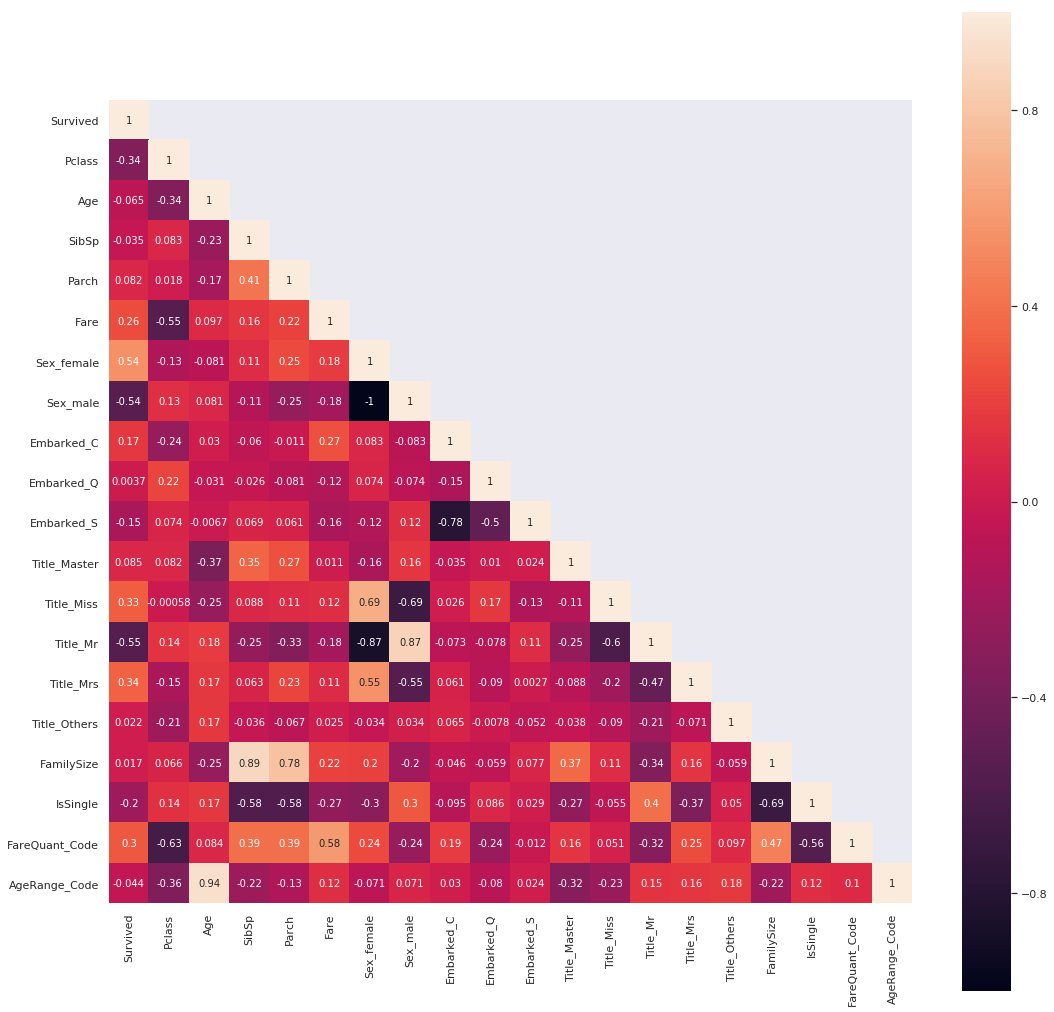

In [30]:
cor_mat = df[:].corr(method='pearson')
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(18, 18)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

## Correlations with Survived features

In [31]:
lst = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others', 'FamilySize', 'IsSingle', 'FareQuant_Code', 'AgeRange_Code']

In [32]:
for col in lst:
    if col != 'Survived':
        print('Survival Correlation by {}:'.format(col))
        print(df[[col, 'Survived']].groupby(col, as_index=False).mean())
        print('\nchi2_contingency:')
        cross_table = pd.crosstab(df['Survived'], df[col])
        chi2, p_val, _, _ = stats.chi2_contingency(cross_table)
        print('chi2: {}, p_value: {}\n'.format(chi2, p_val))
        print(10 * '*')

Survival Correlation by Pclass:
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

chi2_contingency:
chi2: 102.88898875696056, p_value: 4.549251711298793e-23

**********
Survival Correlation by Sex:
      Sex  Survived
0  female  0.742038
1    male  0.188908

chi2_contingency:
chi2: 260.71702016732104, p_value: 1.1973570627755645e-58

**********
Survival Correlation by SibSp:
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

chi2_contingency:
chi2: 37.27179291520431, p_value: 1.5585810465902116e-06

**********
Survival Correlation by Parch:
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000

chi2_contingency:
chi2: 27.925784060236168, p_value: 9.703526421039997e-05

**********
Survival Correlation by Embarked:
  Embarked  Survived
0        C  0.553571
1   

# Univariate Analysis

## Survived distribution

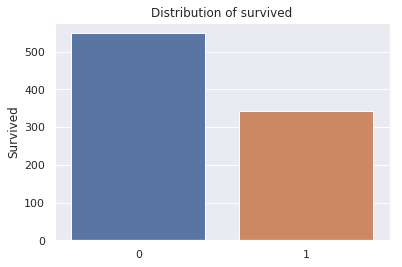

In [33]:
sns.barplot(x=df['Survived'].unique(), y=df['Survived'].value_counts())
plt.title('Distribution of survived');

In [34]:
Purcent_of_died = df['Survived'][df['Survived'] == 0].count()
Purcent_of_survived = df['Survived'][df['Survived'] == 1].count()
Total = df['Survived'].count()

print("Purcent of died: {}%".format((Purcent_of_died / Total * 100).round(0)))
print("Purcent of survived: {}%".format((Purcent_of_survived / Total * 100).round(0)))

Purcent of died: 62.0%
Purcent of survived: 38.0%


**About 2/3 of people died.**

## P-Class distribution

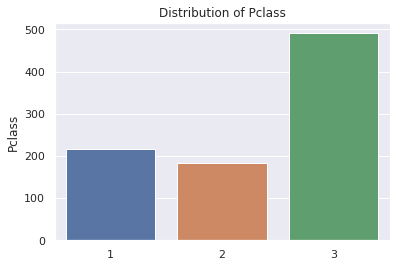

In [35]:
sns.barplot(x=df['Pclass'].unique(), y=df['Pclass'].value_counts())
plt.title('Distribution of Pclass');

In [36]:
Purcent_of_class_1 = df['Pclass'][df['Pclass'] == 1].count()
Purcent_of_class_2 = df['Pclass'][df['Pclass'] == 2].count()
Purcent_of_class_3 = df['Pclass'][df['Pclass'] == 3].count()
Total = df['Pclass'].count()

print("Purcent_of_class_1: {}%".format((Purcent_of_class_1 / Total * 100).round(0)))
print("Purcent_of_class_2: {}%".format((Purcent_of_class_2 / Total * 100).round(0)))
print("Purcent_of_class_3: {}%".format((Purcent_of_class_3 / Total * 100).round(0)))

Purcent_of_class_1: 24.0%
Purcent_of_class_2: 21.0%
Purcent_of_class_3: 55.0%


**More than half of people was in Pclass 3.**

## Sex distribution

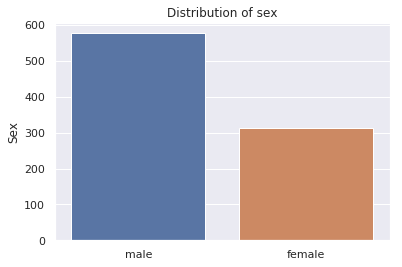

In [37]:
sns.barplot(x=df['Sex'].unique(), y=df['Sex'].value_counts())
plt.title('Distribution of sex');

In [38]:
Purcent_of_male = df['Sex'][df['Sex'] == 'male'].count()
Purcent_of_female = df['Sex'][df['Sex'] == 'female'].count()
Total = df['Sex'].count()

print("Purcent_of_male: {}%".format((Purcent_of_male / Total * 100).round(0)))
print("Purcent_of_female: {}%".format((Purcent_of_female / Total * 100).round(0)))

Purcent_of_male: 65.0%
Purcent_of_female: 35.0%


**About 2/3 of male of board.**

## Age distribution

In [39]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

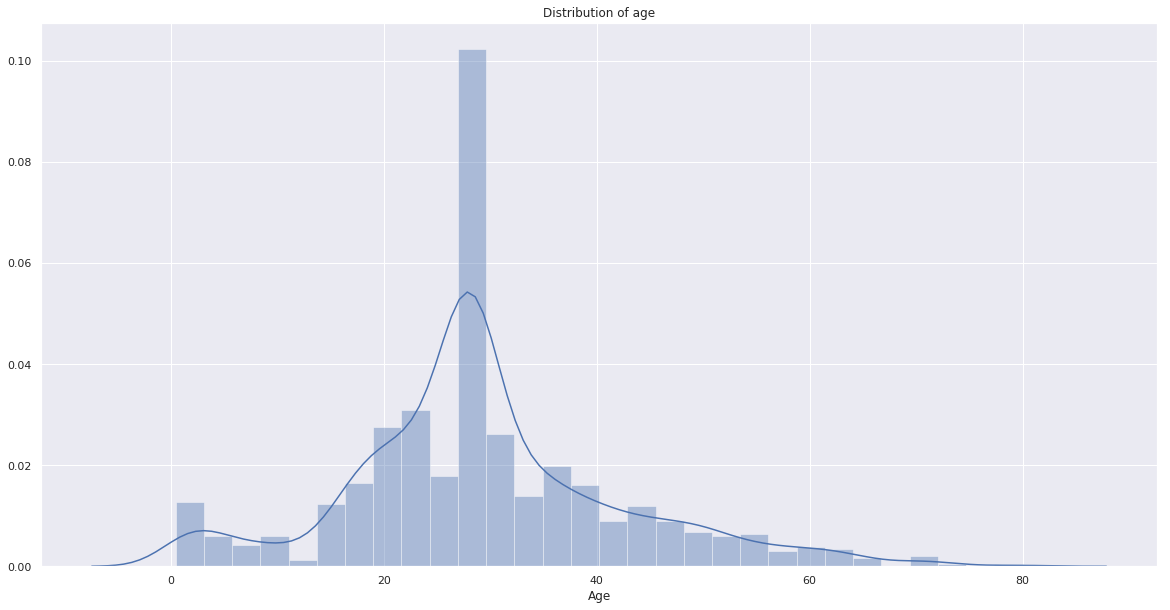

In [40]:
fig, _ = plt.subplots(figsize=(20, 10))
sns.distplot(df['Age'])
plt.title('Distribution of age');

**High representation around 30 but it seems to be a normal distribution.**

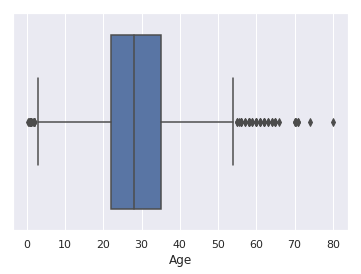

In [41]:
sns.boxplot(df['Age']);

## Interquartile Range

In [42]:
Q1 = 22.0
Q3 = 35.0
IQR = Q3 - Q1
IQR

13.0

In [43]:
low_IQR = Q1 - (1.5 * IQR)
low_IQR

2.5

**All people younger than 3 are outliers.**

In [44]:
high_IQR = (1.5 * IQR) + Q3
high_IQR

54.5

**All people older than 55 are outliers.**

In [45]:
young_outliers = df['Age'][df['Age'] <= 3].count()
old_outliers = df['Age'][df['Age'] >= 55].count()
print("Young outliers: {} and old outliers: {}".format(young_outliers, old_outliers))
Total_age_outliers = young_outliers + old_outliers
print("Total age outliers: {}".format(Total_age_outliers))

Young outliers: 30 and old outliers: 42
Total age outliers: 72


**There is about 8% of outliers (72/891).**

## Sibling/Spouse distribution

Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)

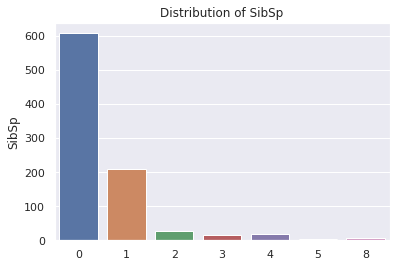

In [46]:
sns.barplot(x=df['SibSp'].value_counts().index, y=df['SibSp'].value_counts())
plt.title('Distribution of SibSp');

In [47]:
Purcent_of_SibSp_0 = df['SibSp'][df['SibSp'] == 0].count()
Purcent_of_SibSp_1 = df['SibSp'][df['SibSp'] == 1].count()
Purcent_of_SibSp_2 = df['SibSp'][df['SibSp'] == 2].count()
Purcent_of_SibSp_3 = df['SibSp'][df['SibSp'] == 3].count()
Purcent_of_SibSp_4 = df['SibSp'][df['SibSp'] == 4].count()
Purcent_of_SibSp_5 = df['SibSp'][df['SibSp'] == 5].count()
Purcent_of_SibSp_8 = df['SibSp'][df['SibSp'] == 8].count()

Total = df['SibSp'].count()


print("Purcent_of_SibSp_0: {}%".format((Purcent_of_SibSp_0 / Total * 100).round(0)))
print("Purcent_of_SibSp_1: {}%".format((Purcent_of_SibSp_1 / Total * 100).round(0)))
print("Purcent_of_SibSp_2: {}%".format((Purcent_of_SibSp_2 / Total * 100).round(0)))
print("Purcent_of_SibSp_3: {}%".format((Purcent_of_SibSp_3 / Total * 100).round(0)))
print("Purcent_of_SibSp_4: {}%".format((Purcent_of_SibSp_4 / Total * 100).round(0)))
print("Purcent_of_SibSp_5: {}%".format((Purcent_of_SibSp_5 / Total * 100).round(0)))
print("Purcent_of_SibSp_8: {}%".format((Purcent_of_SibSp_8 / Total * 100).round(0)))

Purcent_of_SibSp_0: 68.0%
Purcent_of_SibSp_1: 23.0%
Purcent_of_SibSp_2: 3.0%
Purcent_of_SibSp_3: 2.0%
Purcent_of_SibSp_4: 2.0%
Purcent_of_SibSp_5: 1.0%
Purcent_of_SibSp_8: 1.0%


**It seems about 7/10 people was single on board (and without brother or sister).**

## Parch distribution

Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

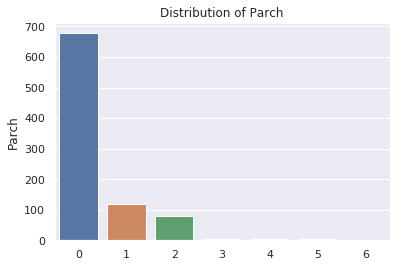

In [48]:
sns.barplot(x=df['Parch'].value_counts().index, y=df['Parch'].value_counts())
plt.title('Distribution of Parch');

In [49]:
Purcent_of_Parch_0 = df['Parch'][df['Parch'] == 0].count()
Purcent_of_Parch_1 = df['Parch'][df['Parch'] == 1].count()
Purcent_of_Parch_2 = df['Parch'][df['Parch'] == 2].count()
Purcent_of_Parch_3 = df['Parch'][df['Parch'] == 3].count()
Purcent_of_Parch_4 = df['Parch'][df['Parch'] == 4].count()
Purcent_of_Parch_5 = df['Parch'][df['Parch'] == 5].count()
Purcent_of_Parch_6 = df['Parch'][df['Parch'] == 6].count()

Total = df['Parch'].count()


print("Purcent_of_Parch_0: {}%".format((Purcent_of_Parch_0 / Total * 100).round(0)))
print("Purcent_of_Parch_1: {}%".format((Purcent_of_Parch_1 / Total * 100).round(0)))
print("Purcent_of_Parch_2: {}%".format((Purcent_of_Parch_2 / Total * 100).round(0)))
print("Purcent_of_Parch_3: {}%".format((Purcent_of_Parch_3 / Total * 100).round(0)))
print("Purcent_of_Parch_4: {}%".format((Purcent_of_Parch_4 / Total * 100).round(0)))
print("Purcent_of_Parch_5: {}%".format((Purcent_of_Parch_5 / Total * 100).round(0)))
print("Purcent_of_Parch_6: {}%".format((Purcent_of_Parch_6 / Total * 100).round(0)))

Purcent_of_Parch_0: 76.0%
Purcent_of_Parch_1: 13.0%
Purcent_of_Parch_2: 9.0%
Purcent_of_Parch_3: 1.0%
Purcent_of_Parch_4: 0.0%
Purcent_of_Parch_5: 1.0%
Purcent_of_Parch_6: 0.0%


**It seems 3/4 of people was without parents & child.**

## Fare distribution

In [50]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**It seems there are outliers in this column.**

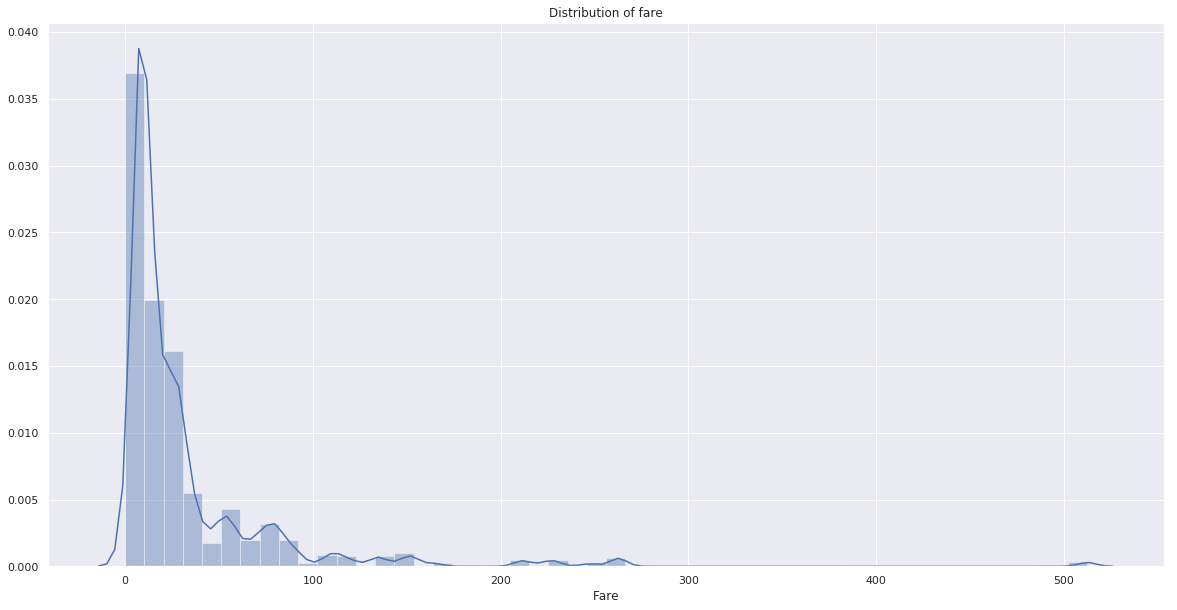

In [51]:
fig, _ = plt.subplots(figsize=(20, 10))
sns.distplot(df['Fare'])
plt.title('Distribution of fare');

**75% of the fare was under 31$.**

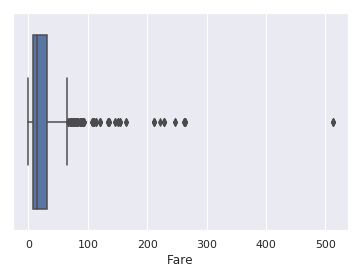

In [52]:
sns.boxplot(df['Fare']);

**There are some outliers here.**

## Interquartile Range

In [53]:
Q1 = 7.910400
Q3 = 31.000000
IQR = Q3 - Q1
IQR

23.0896

In [54]:
high_IQR = (1.5 * IQR) + Q3
high_IQR

65.6344

**All fares higher than 66$ are outliers.**

In [55]:
fare_outliers = df['Fare'][df['Fare'] >= 66]
fare_outliers.count()

116

**There is about 13% of outliers (116/891).**

## Embarked distribution

C = Cherbourg, Q = Queenstown, S = Southampton

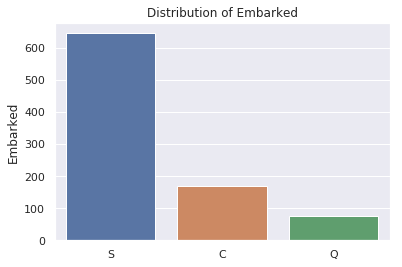

In [56]:
sns.barplot(x=df['Embarked'].value_counts().index, y=df['Embarked'].value_counts())
plt.title('Distribution of Embarked');

In [57]:
Purcent_of_Embarked_S = df['Embarked'][df['Embarked'] == 'S'].count()
Purcent_of_Embarked_C = df['Embarked'][df['Embarked'] == 'C'].count()
Purcent_of_Embarked_Q = df['Embarked'][df['Embarked'] == 'Q'].count()

Total = df['Embarked'].count()

print("Purcent_of_Embarked_S: {}%".format((Purcent_of_Embarked_S / Total * 100).round(0)))
print("Purcent_of_Embarked_C: {}%".format((Purcent_of_Embarked_C / Total * 100).round(0)))
print("Purcent_of_Embarked_Q: {}%".format((Purcent_of_Embarked_Q / Total * 100).round(0)))

Purcent_of_Embarked_S: 73.0%
Purcent_of_Embarked_C: 19.0%
Purcent_of_Embarked_Q: 9.0%


**It seems about 3/4 of people embarked at Southampton.**

## FamilySize Distribution

In [76]:
df['FamilySize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

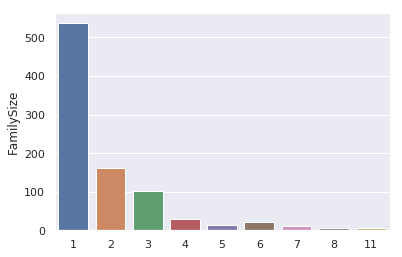

In [73]:
sns.barplot(x=df['FamilySize'].value_counts().index, y=df['FamilySize'].value_counts());

**It seems about 2/3 of people was single.**

In [74]:
Purcent_of_Family_size_1 = df['FamilySize'][df['FamilySize'] == 1].count()
Purcent_of_Family_size_2 = df['FamilySize'][df['FamilySize'] == 2].count()
Purcent_of_Family_size_3 = df['FamilySize'][df['FamilySize'] == 3].count()
Purcent_of_Family_size_4 = df['FamilySize'][df['FamilySize'] == 4].count()
Purcent_of_Family_size_5 = df['FamilySize'][df['FamilySize'] == 5].count()
Purcent_of_Family_size_6 = df['FamilySize'][df['FamilySize'] == 6].count()
Purcent_of_Family_size_7 = df['FamilySize'][df['FamilySize'] == 7].count()
Purcent_of_Family_size_8 = df['FamilySize'][df['FamilySize'] == 8].count()
Purcent_of_Family_size_11 = df['FamilySize'][df['FamilySize'] == 11].count()

Total = df['FamilySize'].count()

print("Purcent_of_Family_size_1: {}%".format((Purcent_of_Family_size_1 / Total * 100).round(0)))
print("Purcent_of_Family_size_2: {}%".format((Purcent_of_Family_size_2 / Total * 100).round(0)))
print("Purcent_of_Family_size_3: {}%".format((Purcent_of_Family_size_3 / Total * 100).round(0)))
print("Purcent_of_Family_size_4: {}%".format((Purcent_of_Family_size_4 / Total * 100).round(0)))
print("Purcent_of_Family_size_5: {}%".format((Purcent_of_Family_size_5 / Total * 100).round(0)))
print("Purcent_of_Family_size_6: {}%".format((Purcent_of_Family_size_6 / Total * 100).round(0)))
print("Purcent_of_Family_size_7: {}%".format((Purcent_of_Family_size_7 / Total * 100).round(0)))
print("Purcent_of_Family_size_8: {}%".format((Purcent_of_Family_size_8 / Total * 100).round(0)))
print("Purcent_of_Family_size_11: {}%".format((Purcent_of_Family_size_11 / Total * 100).round(0)))

Purcent_of_Family_size_1: 60.0%
Purcent_of_Family_size_2: 18.0%
Purcent_of_Family_size_3: 11.0%
Purcent_of_Family_size_4: 3.0%
Purcent_of_Family_size_5: 2.0%
Purcent_of_Family_size_6: 2.0%
Purcent_of_Family_size_7: 1.0%
Purcent_of_Family_size_8: 1.0%
Purcent_of_Family_size_11: 1.0%


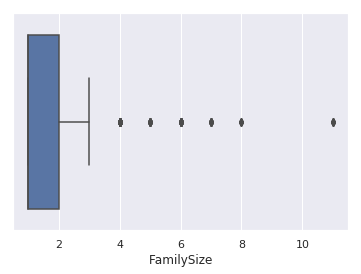

In [75]:
sns.boxplot(df['FamilySize']);

# Multivariate Analysis

## Survived & Sex features

1 -> men  
2 -> women

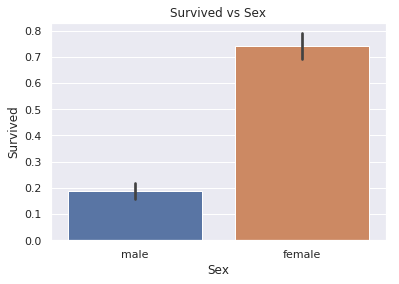

In [58]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survived vs Sex');

**It seems women had a better survival rate than men.**

## Survived & Age features

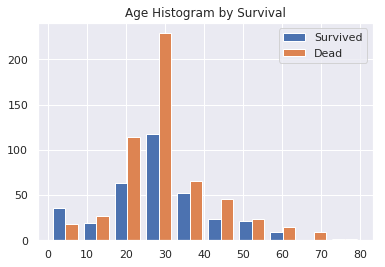

In [78]:
plt.hist(x=[df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']], label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.legend();

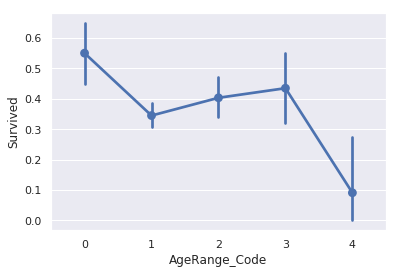

In [89]:
sns.pointplot(x='AgeRange_Code', y='Survived',  data=df);

## Survived & Parch features

Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

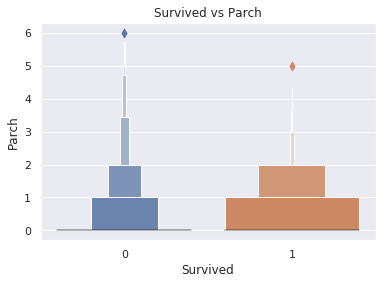

In [59]:
sns.boxenplot(x=df['Survived'], y=df['Parch'])
plt.title('Survived vs Parch');

**It seems that people most survived had between 0 and 2 Parch.**

## Survived & Fare features

0 -> dead  
1 -> survived

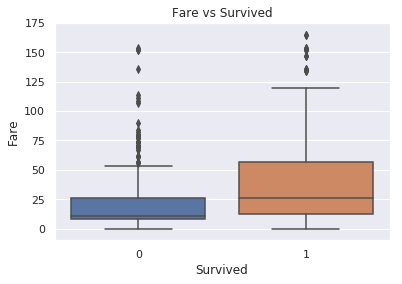

In [60]:
ax = sns.boxplot(x=df['Survived'], y=df['Fare'])
ax.set(ylim=(-10, 175))
plt.title('Fare vs Survived');

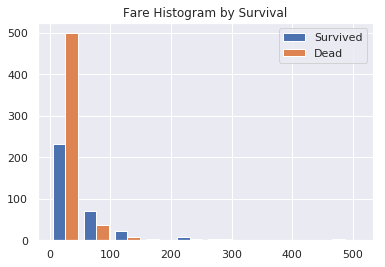

In [77]:
plt.hist(x=[df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']], label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.legend();

**It seems that people who paid high fare had more chances to survive.**

## Survived & Fare_Code Features

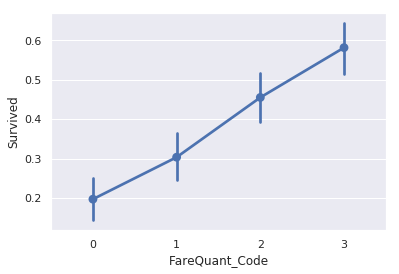

In [88]:
sns.pointplot(x='FareQuant_Code', y='Survived',  data=df);

**It confirms our hypothesis.**

## Survived & Embarked features

1 -> S (72%)  
2 -> C (19%)  
3 -> Q (9%)

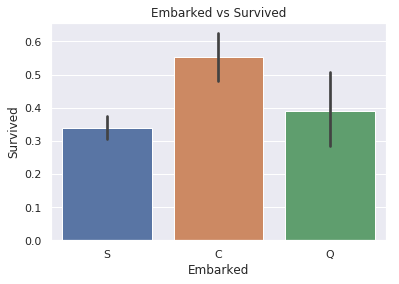

In [61]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Embarked vs Survived');

**It seems people had embarked in C had better chances to survive than S or Q.**

## Survived & FamilySize features

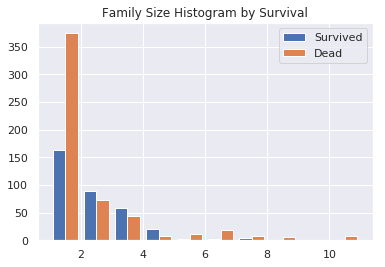

In [79]:
plt.hist(x=[df[df['Survived']==1]['FamilySize'], df[df['Survived']==0]['FamilySize']], label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.legend();

## Survived & Pclass features

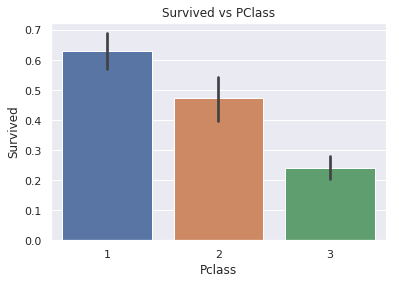

In [100]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survived vs PClass');

**It seems the survival rate decrease with thr Pclass.**

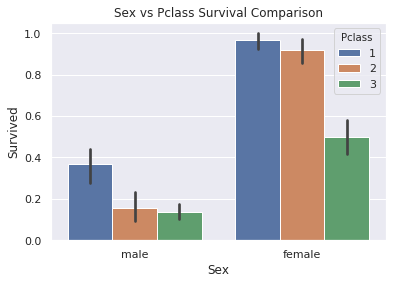

In [99]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)
plt.title('Sex vs Pclass Survival Comparison');

**The survival rate is better for women in particular for the first two classes.**

## Survived & IsSingle features

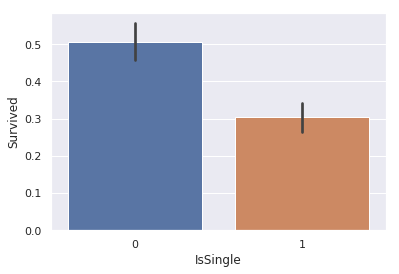

In [82]:
sns.barplot(x='IsSingle', y='Survived', data=df);

**It seems there are more single people who died.**

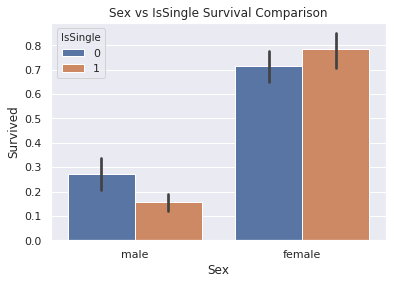

In [103]:
sns.barplot(x='Sex', y='Survived', hue='IsSingle', data=df)
plt.title('Sex vs IsSingle Survival Comparison');

**The survival rate is better for single women on the other hand this rate is worst for men.**

## Survived & FamilySize Features

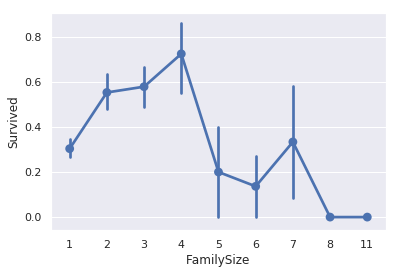

In [91]:
sns.pointplot(x='FamilySize', y='Survived', data=df);

## Sex & SibSp features

Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored) 

Sex:  
1 -> men  
2 -> women  

Survived:  
0 -> dead  
1 -> Survived

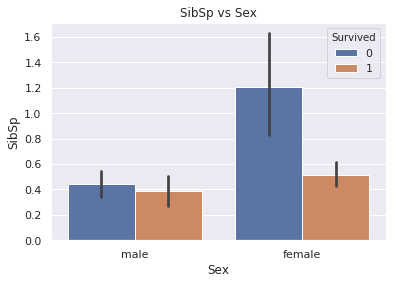

In [62]:
sns.barplot(x='Sex', y='SibSp', hue='Survived', data=df)
plt.title('SibSp vs Sex');

**It seems women were more accompanied by Sibing or Spouse than men but most part of them are dead during the sinking.**

## Sex & Parch features

Sex:  
1 -> men  
2 -> women  

Parch:  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson

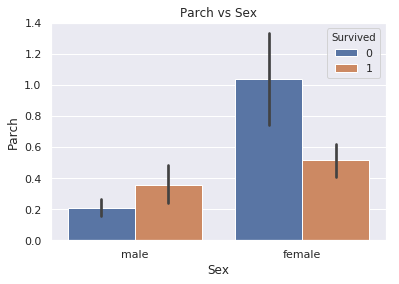

In [63]:
sns.barplot(x='Sex', y='Parch', hue='Survived', data=df)
plt.title('Parch vs Sex');

**It seems women were more accompanied by a parent or a child than men but most part of them are dead durong the sinking.**

## Sex & Fare features

Sex:  
1 -> men  
2 -> women

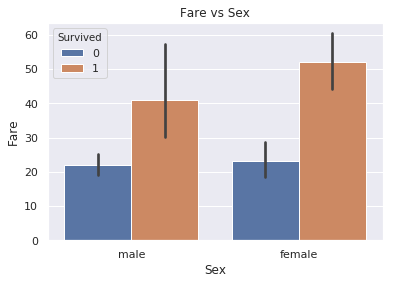

In [64]:
sns.barplot(x='Sex', y='Fare', hue='Survived', data=df)
plt.title('Fare vs Sex');

**It seems women had higher fare than men and most of them survived during the sinking.** 

## Sex & Embarked features

Embarked:  
1 -> S  
2 -> C  
3 -> Q  

Survived:  
0 -> dead  
1 -> survived  

Sex:  
1 -> men  
2 -> women

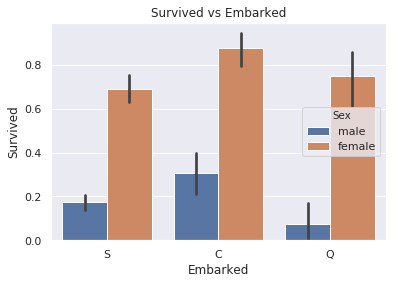

In [65]:
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=df)
plt.title('Survived vs Embarked');

**It seems people who embarked in C had more chances to survive and this is especially true for women.**

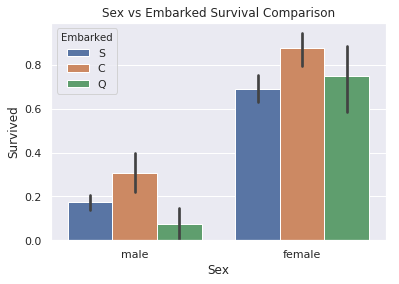

In [98]:
sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df)
plt.title('Sex vs Embarked Survival Comparison');

**Overall, womens had better chances to survive and it seems this gap is higher for Q.** 

## Age & Fare features

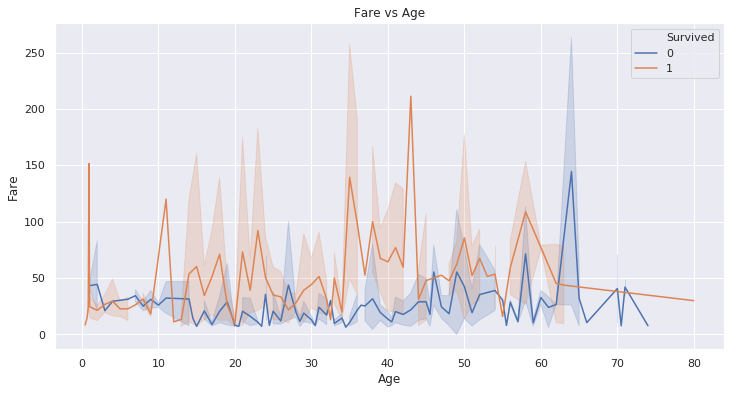

In [66]:
fig, _ = plt.subplots(figsize=(12, 6))
sns.lineplot(x=df['Age'], y=df['Fare'], hue=df['Survived'])
plt.title('Fare vs Age');

**It seems people older than 35 paid more fare than the others and this feature had influenced the survival rate.**

## SibSp & Parch features

Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

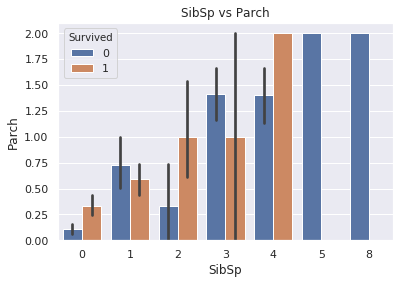

In [67]:
sns.barplot(x='SibSp', y='Parch', hue='Survived', data=df)
plt.title('SibSp vs Parch');

**Up to 5 members in a family, the survival rate is null.**

## SibSp & Fare features

Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)

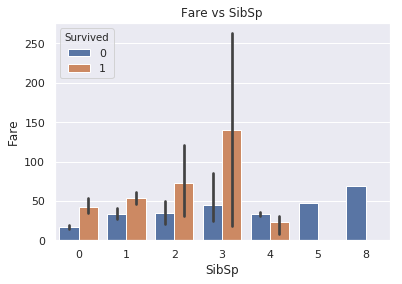

In [68]:
sns.barplot(x='SibSp', y='Fare', hue='Survived', data=df)
plt.title('Fare vs SibSp');

**Most people survived for higher fare until SibSp <= 3. After that, most people died even for high fare.**

## Parch & Fare features

Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

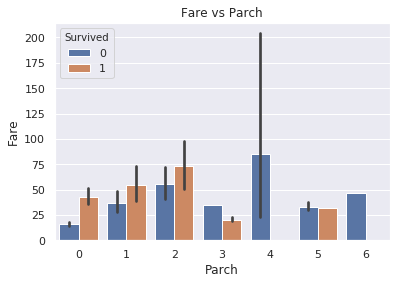

In [69]:
sns.barplot(x='Parch', y='Fare', hue='Survived', data=df)
plt.title('Fare vs Parch');

**Most people survived for 2 Parch max.**

## Pclass & Survived features

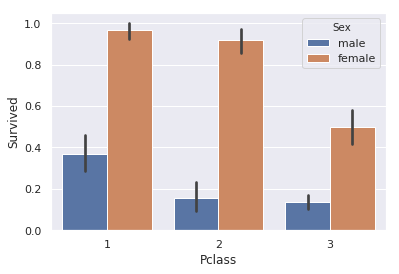

In [70]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df);

**It seems most people who survived was on first & second class regardless of gender.**

## Pclass & Fare Features

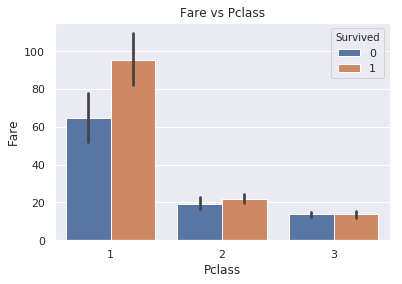

In [94]:
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Fare vs Pclass');

**First class is the farest class where most people survived.**

## Pclass & Age Features

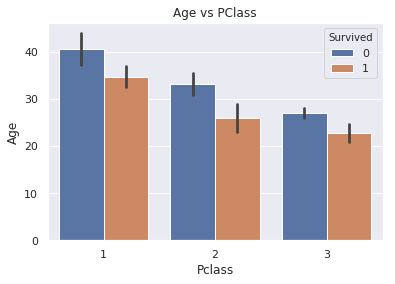

In [96]:
sns.barplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Age vs PClass');

**It seems the age decrease with PClass without difference between survived or died.**

## Pclass & FamilySize Features

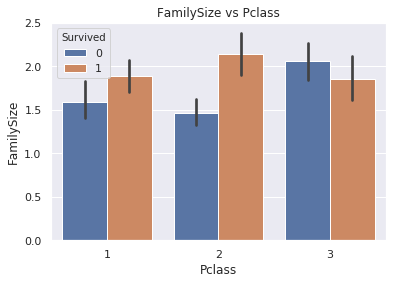

In [97]:
sns.barplot(x='Pclass', y='FamilySize', hue='Survived', data=df)
plt.title('FamilySize vs Pclass');

**For the two first class, people with a family Size around 2 had better chances to survive contrary to the third class.**

# -----------------------------------------------------------------------------------------------------

# Machine Learning - Supervised learning

# -----------------------------------------------------------------------------------------------------

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,FamilySize,IsSingle,FareQuant_Code,AgeRange_Code
PassengerId,,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1,0,0,2,0,0,1
2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,0,0,0,1,0,2,0,3,2
3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,1,0,0,0,1,1,1,1
4,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1,0,0,0,1,0,2,0,3,2
5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1,0,0,1,1,1,2


In [43]:
# X = df.loc[:, df.columns != 'Survived']
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others', 'FamilySize', 'IsSingle', 'FareQuant_Code', 'AgeRange_Code']]
y = df['Survived']

In [44]:
X.shape, y.shape

((891, 19), (891,))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [46]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((623, 19), (623,), (268, 19), (268,))

## Best model:

In [47]:
pipelines = []

pipelines.append(('KNeighborsClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('SVC', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('SVC', SVC(random_state=42))])))
pipelines.append(('LogisticRegression', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LR', LogisticRegression(random_state=42))])))
pipelines.append(('RandomForestClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])))
pipelines.append(('XGBClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('XBGC', XGBClassifier(random_state=42))])))
pipelines.append(('AdaBoostClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('ABC', AdaBoostClassifier(random_state=42))])))
pipelines.append(('BaggingClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('BC', BaggingClassifier(random_state=42))])))
pipelines.append(('ExtraTreesClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('ETC', ExtraTreesClassifier(random_state=42))])))
pipelines.append(('GradientBoostingClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('GBC', GradientBoostingClassifier(random_state=42))])))
pipelines.append(('LogisticRegressionCV', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LRCV', LogisticRegressionCV(random_state=42))])))
pipelines.append(('PassiveAggressiveClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('PAC', PassiveAggressiveClassifier(random_state=42))])))
pipelines.append(('RidgeClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('RC', RidgeClassifier(random_state=42))])))
pipelines.append(('RidgeClassifierCV', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('RCCV', RidgeClassifierCV())])))
pipelines.append(('SGDClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('SGDC', SGDClassifier(random_state=42))])))
pipelines.append(('LinearSVC', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LSVC', LinearSVC(random_state=42))])))
pipelines.append(('NuSVC', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('NSVC', NuSVC(random_state=42))])))
pipelines.append(('DecisionTreeClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('DTC', DecisionTreeClassifier(random_state=42))])))
pipelines.append(('ExtraTreeClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('ETC', ExtraTreeClassifier(random_state=42))])))
pipelines.append(('GaussianProcessClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('GPC', GaussianProcessClassifier(random_state=42))])))
pipelines.append(('Perceptron', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('P', Perceptron(random_state=42))])))
pipelines.append(('BernoulliNB', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('BNB', BernoulliNB())])))
pipelines.append(('GaussianNB', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('GNB', GaussianNB())])))
pipelines.append(('LinearDiscriminantAnalysis', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('QuadraticDiscriminantAnalysis', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('QDA', QuadraticDiscriminantAnalysis())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

KNeighborsClassifier: 0.8250727734423386 (0.01741040215656462)
SVC: 0.8202573392790784 (0.032760812390853454)
LogisticRegression: 0.7977595069986374 (0.04132285593156074)
RandomForestClassifier: 0.7769029480986003 (0.022839463286898926)
XGBClassifier: 0.8234315000619349 (0.021644785520912514)
AdaBoostClassifier: 0.8010033444816055 (0.03953156566674203)
BaggingClassifier: 0.7913802180106528 (0.02520011685519798)
ExtraTreesClassifier: 0.7608850489285272 (0.02718588932673139)
GradientBoostingClassifier: 0.8170367273628143 (0.034780208375682256)
LogisticRegressionCV: 0.8250495478756349 (0.023915525415224643)
PassiveAggressiveClassifier: 0.617730397621702 (0.11386620158405668)
RidgeClassifier: 0.7945621206490773 (0.03636736302823995)
RidgeClassifierCV: 0.8042007308311656 (0.03547902951784087)
SGDClassifier: 0.7317601882819275 (0.08928053117045179)
LinearSVC: 0.7865260745695529 (0.031665323084244475)
NuSVC: 0.8202573392790784 (0.029283801759184592)
DecisionTreeClassifier: 0.7624798711755233 

In [53]:
pipe = Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('KNC', KNeighborsClassifier())])

pipe.fit(X_train, y_train)

print("train_score: {}".format(pipe.score(X_train, y_train)))

train_score: 0.869983948635634


## Fix learning rate and number of estimators for tuning tree-based parameters

In [77]:
# from sklearn.model_selection import GridSearchCV

# xgb1 = XGBClassifier(random_state=42)

# kfold = KFold(random_state=42)

# pipe = Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('XBGC', xgb1)])

# param_test = {
#     'XBGC__learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
#     'XBGC__n_estimators': range(50, 400, 50) 
# }

# gsearch = GridSearchCV(pipe, param_test, scoring='accuracy', iid=False, cv=kfold)

# gsearch.fit(X_train, y_train)

# print("Best parameter (CV score={}):".format(gsearch.best_score_))
# print(gsearch.best_params_)

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Best parameter (CV score=0.8296404682274247):
{'XBGC__learning_rate': 0.1, 'XBGC__n_estimators': 150}


**learning_rate=0.1, n_estimators=150**

## Tune max_depth and min_child_weight

In [78]:
# xgb2 = XGBClassifier(learning_rate=0.1, n_estimators=150, random_state=42)

# kfold = KFold(random_state=42)

# pipe = Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('XBGC', xgb2)])

# param_test1 = {
#     'XBGC__max_depth': range(0, 10, 2),
#     'XBGC__min_child_weight': range(1, 6, 2)
# }

# gsearch1 = GridSearchCV(pipe, param_test1, scoring='accuracy', iid=False, cv=kfold)

# gsearch1.fit(X_train, y_train)

# print("Best parameter (CV score={}):".format(gsearch1.best_score_))
# print(gsearch1.best_params_)

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

Best parameter (CV score=0.8328533382881208):
{'XBGC__max_depth': 6, 'XBGC__min_child_weight': 1}


**learning_rate=0.1, n_estimators=150, max_depth=6, min_child_weight=1**

## Tune gamma:

In [79]:
# xgb3 = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=6, min_child_weight=1, random_state=42)

# kfold = KFold(random_state=42)

# pipe = Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('XBGC', xgb3)])

# param_test2 = {'XBGC__gamma':[i/10.0 for i in range(0,5)]}

# gsearch2 = GridSearchCV(pipe, param_test2, scoring='accuracy', iid=False, cv=kfold)

# gsearch2.fit(X_train, y_train)

# print("Best parameter (CV score={}):".format(gsearch2.best_score_))
# print(gsearch2.best_params_)

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

Best parameter (CV score=0.8440867707172055):
{'XBGC__gamma': 0.4}


/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**learning_rate=0.1, n_estimators=150, max_depth=6, min_child_weight=1, gamma=0.4**

## Tune subsample and colsample_bytree:

In [80]:
# xgb4 = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=6, min_child_weight=1, gamma=0.4, random_state=42)

# kfold = KFold(random_state=42)

# pipe = Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('XBGC', xgb4)])

# param_test3 = {
#     'XBGC__subsample': np.linspace(0.1, 1, 10),
#     'XBGC__colsample_bytree': np.linspace(0.1, 1, 10)
# }

# gsearch3 = GridSearchCV(pipe, param_test3, scoring='accuracy', iid=False, cv=kfold)

# gsearch3.fit(X_train, y_train)

# print("Best parameter (CV score={}):".format(gsearch3.best_score_))
# print(gsearch3.best_params_)

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

Best parameter (CV score=0.8440867707172055):
{'XBGC__colsample_bytree': 1.0, 'XBGC__subsample': 1.0}


/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**learning_rate=0.1, n_estimators=150, max_depth=6, min_child_weight=1, gamma=0.4, colsample_bytree=1, subsample=1**

## Tuning Regularization Parameters:

In [81]:
# xgb5 = XGBClassifier(
#     learning_rate=0.1, n_estimators=150, max_depth=6, min_child_weight=1, gamma=0.4, colsample_bytree=1,
#     subsample=1, random_state=42
# )

# kfold = KFold(random_state=42)

# pipe = Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('XBGC', xgb5)])

# param_test4 = {
#     'XBGC__reg_alpha': [1e-5, 1e-2, 0.1, 1, 2, 5, 10, 100]
# }

# gsearch4 = GridSearchCV(pipe, param_test4, scoring='accuracy', iid=False, cv=kfold)

# gsearch4.fit(X_train, y_train)

# print("Best parameter (CV score={}):".format(gsearch4.best_score_))
# print(gsearch4.best_params_)

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

Best parameter (CV score=0.8440867707172055):
{'XBGC__reg_alpha': 1e-05}


**learning_rate=0.1, n_estimators=150, max_depth=6, min_child_weight=1, gamma=0.4, colsample_bytree=1, subsample=1, reg_alpha=1e-05**

## Best params for XGBClassifier:
**learning_rate=0.1, n_estimators=150, max_depth=6, min_child_weight=1, gamma=0.4, colsample_bytree=1, subsample=1, reg_alpha=1e-05**

In [161]:
# XGBC = XGBClassifier(
#     learning_rate=0.1, n_estimators=150, max_depth=6, min_child_weight=1, gamma=0.4,
#     colsample_bytree=1, subsample=1, reg_alpha=1e-05, random_state=42
# )

# pipe = Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('XBGC', XGBC)])

# pipe.fit(X_train, y_train)

# print("train_score: {}".format(pipe.score(X_train, y_train)))

train_score: 0.9694533762057878


/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# ------------------------------------------------------------------------
# --------------------------------TEST---------------------------------
# ------------------------------------------------------------------------

In [43]:
base_path = os.path.join('../input/test.csv')
base_path

'../input/test.csv'

In [44]:
df_test = pd.read_csv(os.path.join(base_path))

In [45]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [48]:
df_test = df_test.set_index(df_test['PassengerId'])
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
df_test = df_test.drop(labels='PassengerId', axis=1)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
df_test = df_test.drop(labels='Ticket', axis=1)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


In [51]:
df_test = df_test.drop(labels='Cabin', axis=1)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [52]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [53]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 29.4+ KB


In [54]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 29.4+ KB


In [56]:
df_test['Sex_Code'] = label.fit_transform(df_test['Sex'])

In [57]:
df_test = df_test.drop(labels='Sex', axis=1)
df_test.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Sex_Code
PassengerId,,,,,,,,
892,3,"Kelly, Mr. James",34.5,0,0,7.8292,Q,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,S,0
894,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,Q,1
895,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,S,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,S,0


In [58]:
df_test['Embarked_Code'] = label.fit_transform(df_test['Embarked'])

In [59]:
df_test = df_test.drop(labels='Embarked', axis=1)
df_test.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_Code,Embarked_Code
PassengerId,,,,,,,,
892,3,"Kelly, Mr. James",34.5,0,0,7.8292,1,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,0,2
894,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,1,1
895,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,1,2
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,0,2


In [60]:
df_test['Title_name'] = df_test['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [61]:
df_test = df_test.drop(labels='Name', axis=1)
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Code,Embarked_Code,Title_name
PassengerId,,,,,,,,
892,3,34.5,0,0,7.8292,1,1,Mr
893,3,47.0,1,0,7.0000,0,2,Mrs
894,2,62.0,0,0,9.6875,1,1,Mr
895,3,27.0,0,0,8.6625,1,2,Mr
896,3,22.0,1,1,12.2875,0,2,Mrs


In [62]:
df_test['Title_Code'] = label.fit_transform(df_test['Title_name'])

In [63]:
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Code,Embarked_Code,Title_name,Title_Code
PassengerId,,,,,,,,,
892,3,34.5,0,0,7.8292,1,1,Mr,5
893,3,47.0,1,0,7.0000,0,2,Mrs,6
894,2,62.0,0,0,9.6875,1,1,Mr,5
895,3,27.0,0,0,8.6625,1,2,Mr,5
896,3,22.0,1,1,12.2875,0,2,Mrs,6


In [64]:
df_test = df_test.drop(labels='Title_name', axis=1)
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Code,Embarked_Code,Title_Code
PassengerId,,,,,,,,
892,3,34.5,0,0,7.8292,1,1,5
893,3,47.0,1,0,7.0000,0,2,6
894,2,62.0,0,0,9.6875,1,1,5
895,3,27.0,0,0,8.6625,1,2,5
896,3,22.0,1,1,12.2875,0,2,6


In [65]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [66]:
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Code,Embarked_Code,Title_Code,FamilySize
PassengerId,,,,,,,,,
892,3,34.5,0,0,7.8292,1,1,5,1
893,3,47.0,1,0,7.0000,0,2,6,2
894,2,62.0,0,0,9.6875,1,1,5,1
895,3,27.0,0,0,8.6625,1,2,5,1
896,3,22.0,1,1,12.2875,0,2,6,3


In [67]:
df_test['Sex_Code*Fare'] = df_test['Sex_Code'] * df_test['Fare']

In [68]:
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_Code,Embarked_Code,Title_Code,FamilySize,Sex_Code*Fare
PassengerId,,,,,,,,,,
892,3,34.5,0,0,7.8292,1,1,5,1,7.8292
893,3,47.0,1,0,7.0000,0,2,6,2,0.0000
894,2,62.0,0,0,9.6875,1,1,5,1,9.6875
895,3,27.0,0,0,8.6625,1,2,5,1,8.6625
896,3,22.0,1,1,12.2875,0,2,6,3,0.0000


In [71]:
model = XGBClassifier(random_state=42)

pipe_train = Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('XBGC', model)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(df_test)

y_pred

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [72]:
df_sample_submission = pd.DataFrame({'PassengerId': df_test.index, 'Survived': y_pred})

In [73]:
sample_submission = pd.DataFrame.to_csv(df_sample_submission, index=False)
with open ('../submissions/sample_submission.csv', 'w') as f:
    f.write(sample_submission)

# Score: 0.78468

# My place: 4328 / 10634

# Top 100: 0.80382